IMPORT REQUIRED LIBRARIES

In [ ]:
import pandas as pd

IMPORT THE DATA SET


In [ ]:
data=pd.read_excel(r'/content/iris (1).xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.shape

(128, 5)

In [ ]:
data.groupby('Classification').size()

Classification
Iris-setosa        40
Iris-versicolor    44
Iris-virginica     44
dtype: int64

PREPROCESSING STEPS

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [ ]:
data=data.dropna()


In [ ]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
data[data.duplicated(keep='first')]

,SL,SW,PL,PW,Classification
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [ ]:
data.drop_duplicates()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data[data.duplicated(keep='first')]

,SL,SW,PL,PW,Classification


In [ ]:
data.describe()

,SL,SW,PL,PW
count,128.000000,128.000000,128.000000,128.000000
mean,5.882031,3.035156,3.841406,1.221094
std,0.830466,0.441113,1.753580,0.751340
min,4.300000,2.000000,1.000000,0.100000
25%,5.175000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.225000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


SEPERATE THE DATA SET INTO TARGET VARIABLE AND FEATURE VARIABLE

In [ ]:
X=data.iloc[:,:-1].values  #feature variable

In [ ]:
y=data['Classification']  #targetvariable

SPLITTING THE DATASET INTO TRAINING AND TESTING DATA

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

TRAIN THE MODEL

1. K Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_Classifier=KNeighborsClassifier()
knn_Classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
knn_predictions = knn_Classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
knn_accuracy = accuracy_score(y_test, knn_predictions)


In [ ]:
print("K-Nearest Neighbors Classifier Accuracy:", knn_accuracy)

K-Nearest Neighbors Classifier Accuracy: 1.0


In [ ]:
# CONFUSION MATRIX

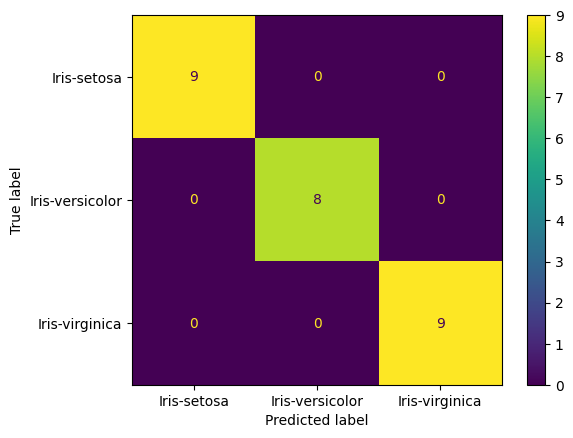

In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

labels=['Iris-setosa','Iris-versicolor','Iris-virginica']

result=confusion_matrix(y_test,knn_predictions)
result


#Calculate the Accuracy Score
score=accuracy_score(y_test,knn_predictions)
score

#Create a Confusion Matrix Display Object:
#using the confusion matrix (result) and specifying the class labels to be displayed on the plot.
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
#Plot the Confusion Matrix
cmd.plot()

2. SVC -support vector classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_classifier=SVC()
svc_classifier.fit(X_train,y_train)

SVC()

In [ ]:
svc_predictions=svc_classifier.predict(X_test)

In [ ]:
svc_accuracy=accuracy_score(y_test,svc_predictions)

In [ ]:
print("Support Vector Classifier Accuracy:", svc_accuracy)

Support Vector Classifier Accuracy: 0.9615384615384616


3. Decision tree classifier





In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [ ]:
clf=clf.fit(X_train,y_train)

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.15 %.


In [ ]:
#CONFUSION MATRIX

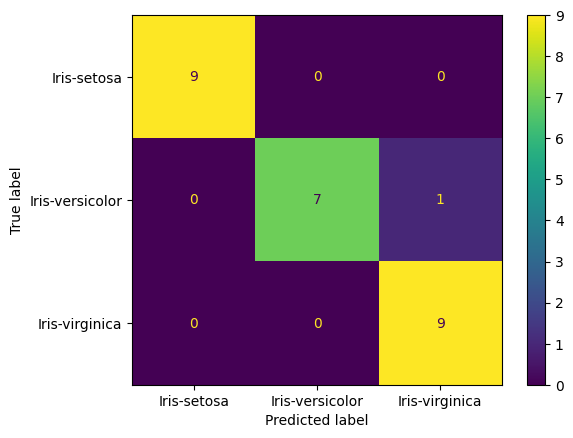

In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

labels=['Iris-setosa','Iris-versicolor','Iris-virginica']

# Calculate the Confusion Matrix:
# calculates the confusion matrix by comparing the
#true labels (y_test) with the predicted labels (y_pred) generated by your classification model.

result=confusion_matrix(y_test,y_pred)
result


#Calculate the Accuracy Score
score=accuracy_score(y_test,y_pred)
score

#Create a Confusion Matrix Display Object:
#using the confusion matrix (result) and specifying the class labels to be displayed on the plot.
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
#Plot the Confusion Matrix
cmd.plot()

4. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

columns = ['SL','SW','PL','PW']
X_train = data[columns]
y_train = data['Classification']

lr = LogisticRegression()

lr.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr_pred=lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, lr_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.15 %.


5. Random forest classifier

In [ ]:
#import random forest classifier
from sklearn.ensemble import RandomForestClassifier
#instantiate the classifier
rfc=RandomForestClassifier(random_state=0)
#fit the model
rfc.fit(X_train,y_train)
#predict the Test set results
y_pred=rfc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.15 %.


So the Classification model,KNN(K nearest neighbor) model gives the best result.since it has 100 % accuracy and also based on the confusion matrix.